<a href="https://colab.research.google.com/github/Animesh-Guchhait/NLP/blob/master/Assignment_04_AnimeshGuchhait_MDS202004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Animesh Guchhait

MDS202004

In [ ]:
# Important libraries
import math
import numpy as np
import pandas as pd
import random

import numpy as np
from copy import deepcopy
import re
import sklearn
import os
from operator import itemgetter
from random import shuffle
from tqdm import tqdm
from collections import defaultdict


from gensim.models import word2vec
from gensim.models import Word2Vec
import logging
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this assignment, I am going to use the preprocessed corpus of assignment 2 ( which I have preprocessed in that assignment).

Unzip the saved preprocessed corpus. In this corpus I have used whole provided data set.

In [ ]:
!cp /content/drive/MyDrive/NLP/preproc_2.zip preproc_2.zip
!unzip -q preproc_2.zip
print('Unzip Completed')

Unzip Completed


In [ ]:
''' I am adding up all the text file in a single text file and 
saving it with the name covid19_corpus.txt to use it in gensim word2vec model '''


path='/content/content/preproc1'
filenames = os.listdir(path)

def text(filenames,path):
  with open('covid19_corpus.txt','a') as f:
    for x in filenames:
      with open('/content/content/preproc1/'+x,'r') as f1:
        t=f1.read()
        f.write(t)
  print('ready')


In [ ]:
text(filenames,path)

ready


In [ ]:
''' Gensim word2vec model with vector size 128, minimum count= 50
   window = 5 
   The trained model will be saved in drive in the end'''

def compute_word_vectors(): 
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    text = word2vec.Text8Corpus('covid19_corpus.txt')
    model = word2vec.Word2Vec(text, size=128, window=5, min_count=50, workers=10, iter=10)
    model.save('/content/drive/MyDrive/NLP/word2vec_ass4.model.bin')

In [ ]:
compute_word_vectors() # word2vec model building 

2022-05-17 17:56:07,491 : INFO : collecting all words and their counts
2022-05-17 17:56:07,496 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-17 17:56:48,376 : INFO : PROGRESS: at sentence #10000, processed 100000000 words, keeping 1638634 word types
2022-05-17 17:57:01,429 : INFO : collected 1982161 word types from a corpus of 130897512 raw words and 13090 sentences
2022-05-17 17:57:01,438 : INFO : Loading a fresh vocabulary
2022-05-17 17:57:02,516 : INFO : effective_min_count=50 retains 64695 unique words (3% of original 1982161, drops 1917466)
2022-05-17 17:57:02,520 : INFO : effective_min_count=50 leaves 125090851 word corpus (95% of original 130897512, drops 5806661)
2022-05-17 17:57:02,730 : INFO : deleting the raw counts dictionary of 1982161 items
2022-05-17 17:57:02,813 : INFO : sample=0.001 downsamples 16 most-common words
2022-05-17 17:57:02,818 : INFO : downsampling leaves estimated 122942027 word corpus (98.3% of prior 125090851)
2022-05

The above model is saved in the following link

https://drive.google.com/file/d/1pd68qp9Vzov3L91OpQhiF9nQA2Y17KTH/view?usp=sharing

In [ ]:
# keywords, I am going to use
keywords=['isolation','surgery','medicine','asymptomatic' ,'coronaviruses', 'hospitalization','epidemiological','lung','pneumonia']

In [ ]:
# function to compute similar words 
def compute_similar_words(model,source_word, topn=5):
    print('\r Computing similar words for the source word - {0}'.format(source_word),end='')
    similar_words = [source_word]
    try:
        top_words = model.wv.most_similar(source_word,topn=topn)
        similar_words.extend([val[0] for val in top_words])
    except KeyError as err:
        print(err.args)
    return similar_words

In [ ]:
#funcion to find similar words at 3 levels. I tried for similar words at 4 level deep but the graph is getting clumsy so I am keeping calculating similar words at level 3.
def compute_similar_words_for_assignment4(model):
    columns = ['word'+str(i-1) for i in range(1,7)]
    df = pd.DataFrame(data=None,columns=columns)

    #Keywords contains the list of keywords from the vocabulary. 
    #These keywords are used to find similar words 

    for source_word in keywords:
        similar_words = compute_similar_words(model,source_word)
        df.loc[len(df)] = similar_words
        
        for i in range(1,len(similar_words)):
            sec_similar_words = compute_similar_words(model,similar_words[i])
            df.loc[len(df)] = sec_similar_words

            for j in range(1, len(sec_similar_words)):
              third_similar_words = compute_similar_words(model, sec_similar_words[j])
              df.loc[len(df)] = third_similar_words


    #Save similar words to a file. This file will be used to build the graph
    df.to_csv('/content/drive/MyDrive/NLP/similar_words.csv')
    return df

In [ ]:
model= Word2Vec.load('/content/drive/MyDrive/NLP/word2vec_ass4.model.bin') # Load the saved word2Vec model

In [ ]:
df = compute_similar_words_for_assignment4(model)

 Computing similar words for the source word - wheezy

The similar matrix,df  is saved in the following link

https://drive.google.com/file/d/1-0R6-UOmh2zwvjPwssz7rtSgzSu6B104/view?usp=sharing

In [ ]:
df

,word0,word1,word2,word3,word4,word5
0,isolation,quarantine,cohorting,isolating,quarantining,containment
1,quarantine,selfisolation,quarantining,selfquarantine,quarantined,containment
2,selfisolation,quarantine,selfquarantine,selfisolating,selfisolate,quarantining
3,quarantining,quarantine,selfisolation,quarantined,selfquarantine,isolating
4,selfquarantine,selfisolation,selfisolate,quarantine,selfisolating,quarantined
...,...,...,...,...,...,...
274,wheezing,wheeze,wheezy,bronchiolitis,asthma,exacerbation
275,lrti,lrtis,rti,rtis,uri,bronchiolitis
276,croup,laryngotracheobronchitis,bronchiolitis,laryngitis,wheezy,epiglottitis
277,lrtis,rtis,aris,lrti,rti,arti


In [ ]:
#color of each keyword
cmap_components = {'isolation':'red', 
                    'surgery':'chocolate',
                    'medicine':'darkcyan',
                    'asymptomatic' : 'royalblue',
                    'hospitalization':'turquoise', 
                    'epidemiological': 'brown', 
                    'lung':'purple',
                     'pneumonia': 'cyan', 
                    'coronaviruses' : 'green',
                    }

Building the Graph

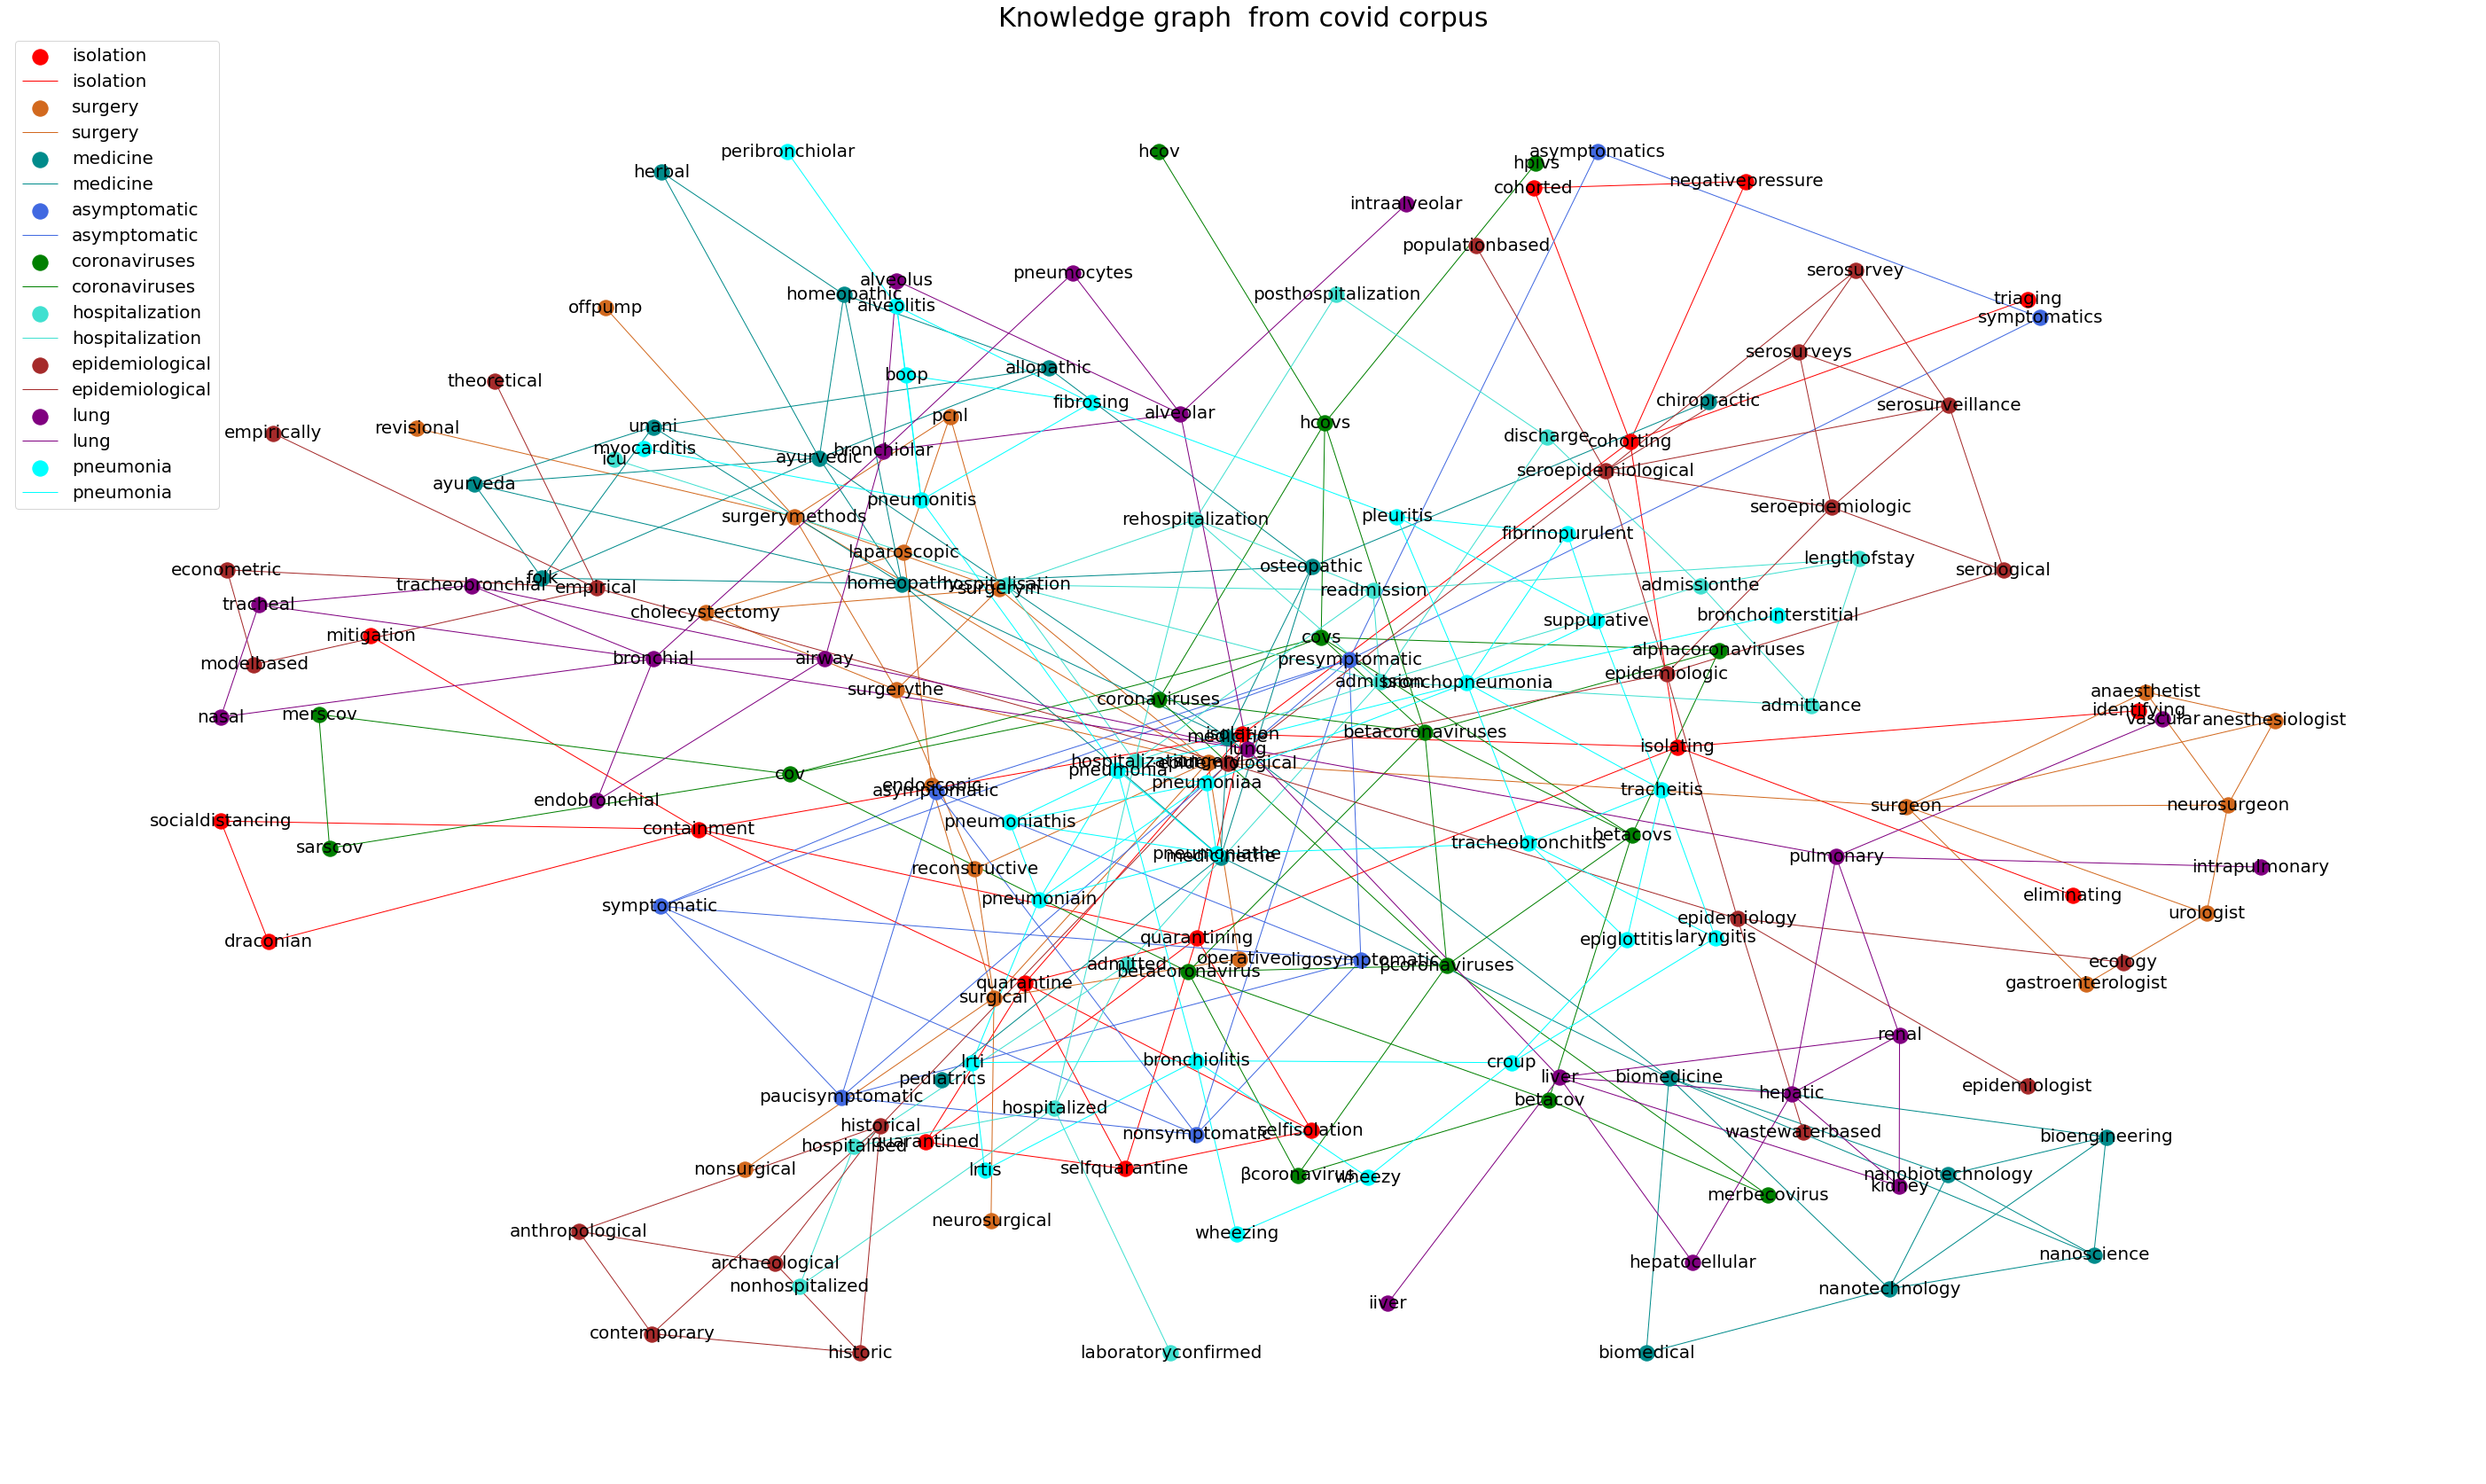

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

words = pd.read_csv('/content/drive/MyDrive/NLP/similar_words.csv')

g = nx.cubical_graph()

#Construct the graph
#for every source word(node), add edges - connected through similarity
#As there two levels of similar words, we need to repeat the same to construct the graph
for i, row in words.iterrows():
    for j in range(1,len(row)):
        g.add_node(row[j])
    for j in range(1,len(row)):
      if row[1] != row[j]:
        g.add_edge(row[1], row[j])    
      
G = nx.petersen_graph()
plt.subplot()
options = {
    #'node_color': 'blue',
    #'node_size': 8,
    #'linewidths': 0.3,
    #'width': 0.5,
    'font_size':20,
}

fedges = filter(lambda x: g.degree()[x[0]] >= 3 and g.degree()[x[1]] >= 5, g.edges())
f = nx.Graph()                                                                                                                                     
f.add_edges_from(fedges)

#This is to show how well the keyword is connected with the other words in the corpus  
#change the keyword to obtain a different graph
#you do not need this while running the entire no

plt.rcParams['figure.figsize'] = [50,30]

for keyword in keywords:
  subgraph = nx.node_connected_component(f,keyword)
#print()
  nx.draw(g.subgraph(subgraph), with_labels=True,**options, edge_color = cmap_components[keyword], node_color = cmap_components[keyword], label = keyword)

plt.legend(loc = 'upper left', fontsize = 'medium', prop={'size': 20})
plt.title("Knowledge graph  from covid corpus", fontsize = 30)
plt.savefig('/content/drive/MyDrive/NLP/knowledge_graph.pdf')
plt.show()

The knowledge graph pdf link:

https://drive.google.com/file/d/1-15HoD6hept-FJfoFnixBNknknnhfVya/view?usp=sharing

Subgraph for each key words

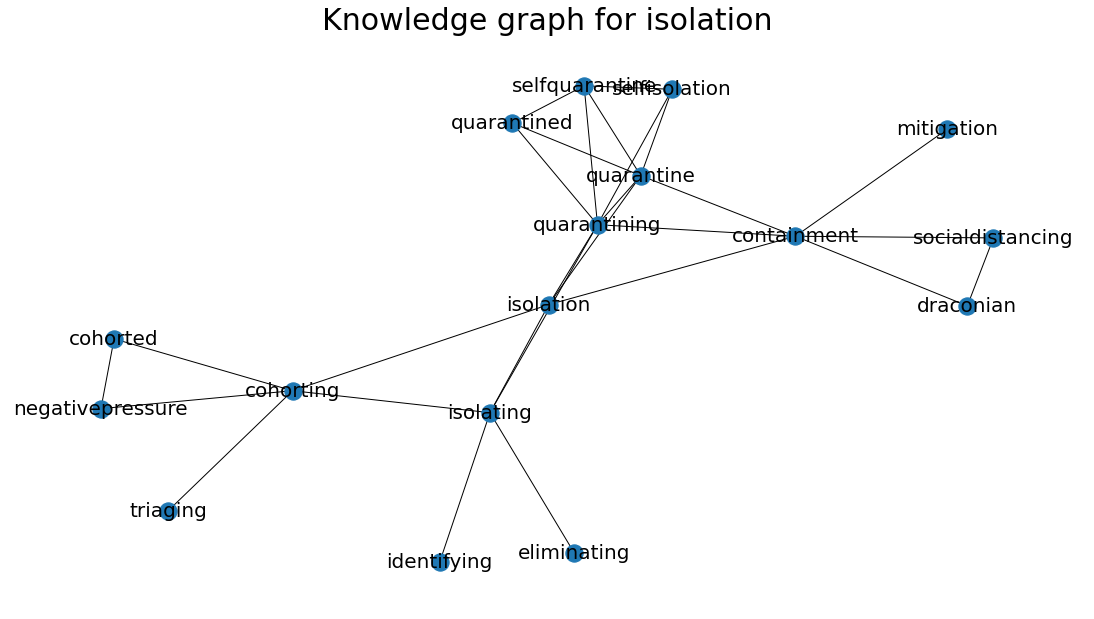

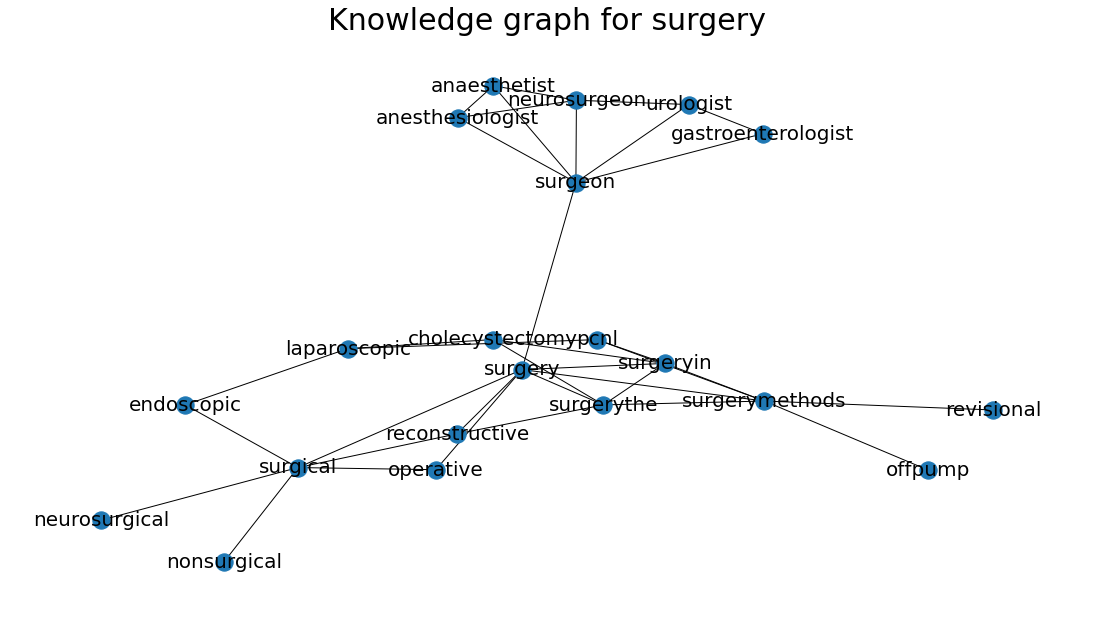

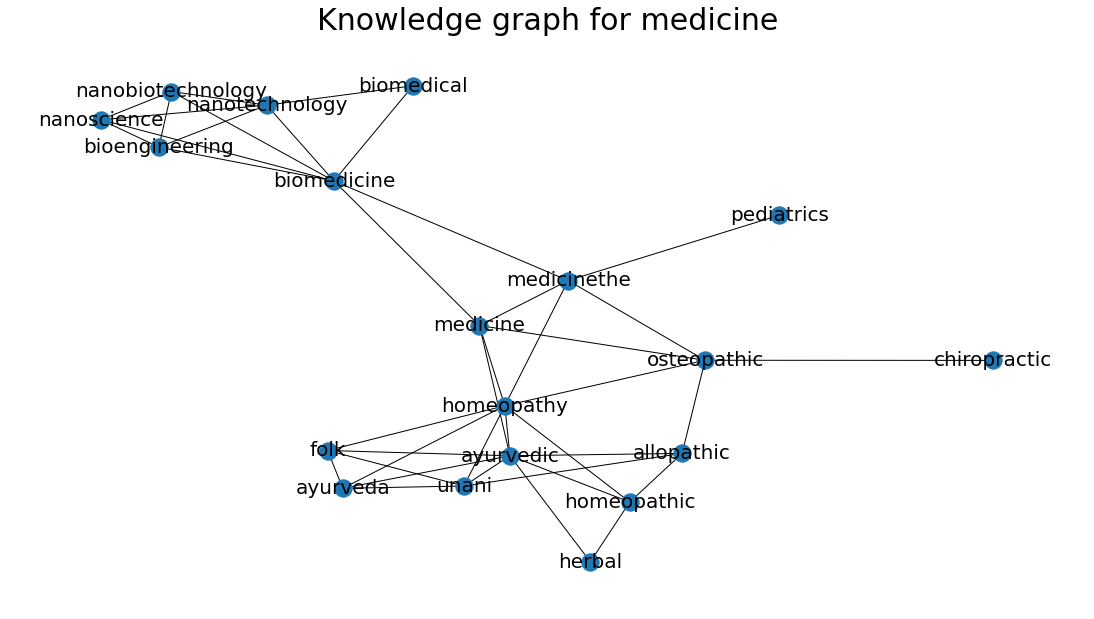

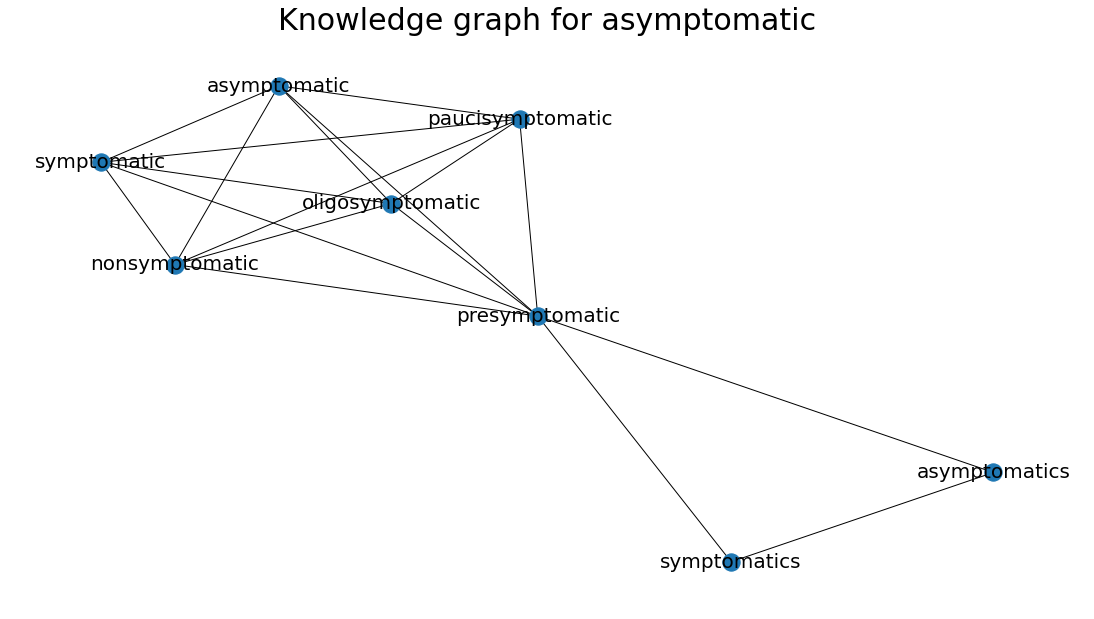

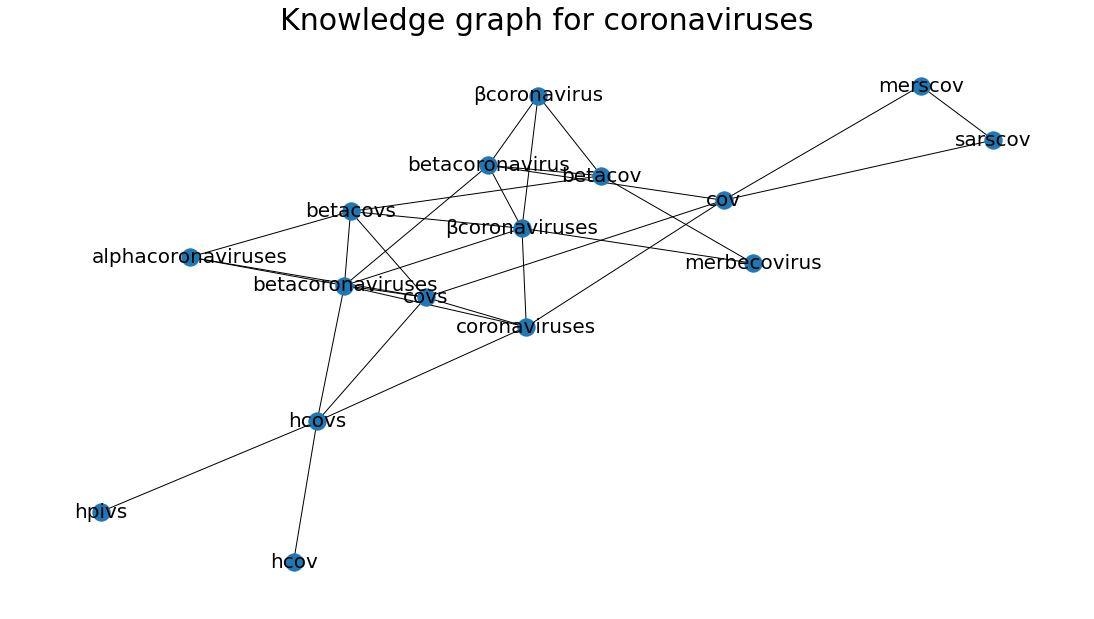

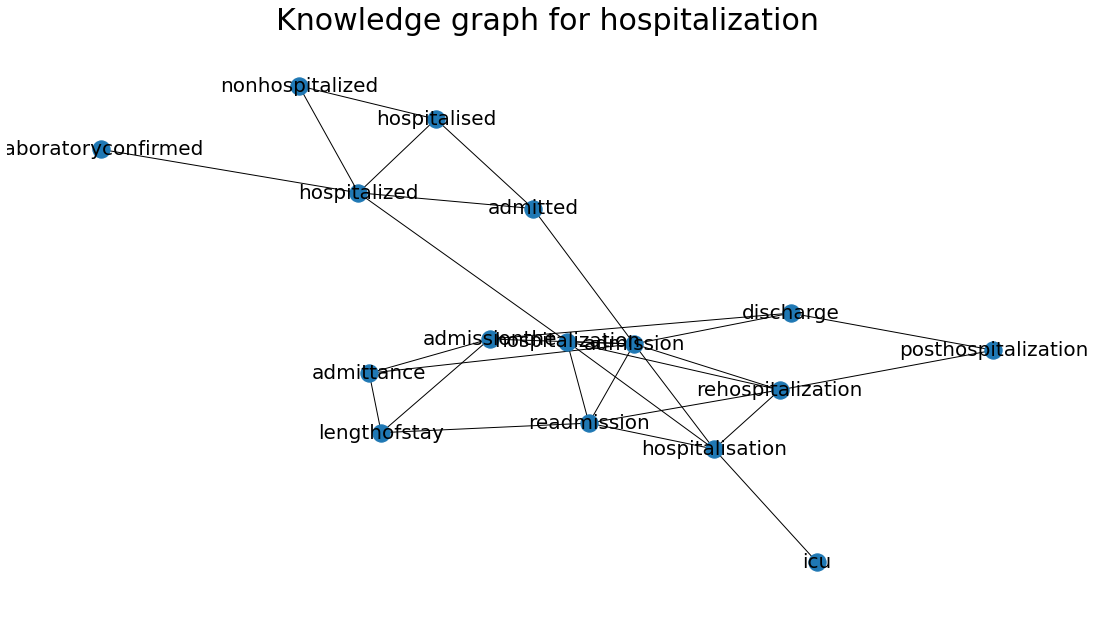

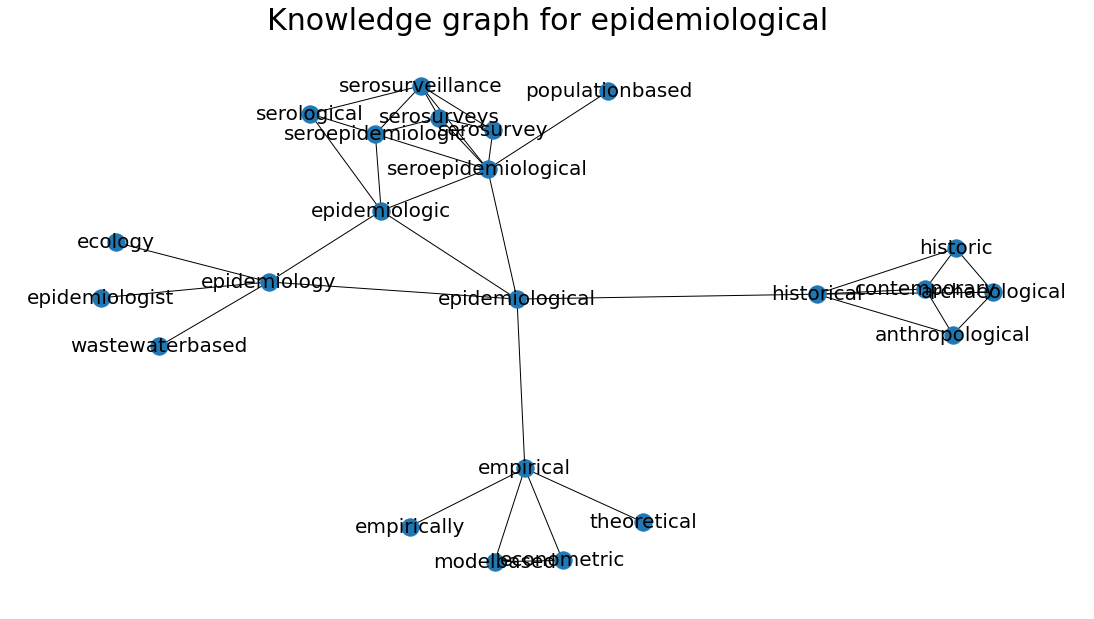

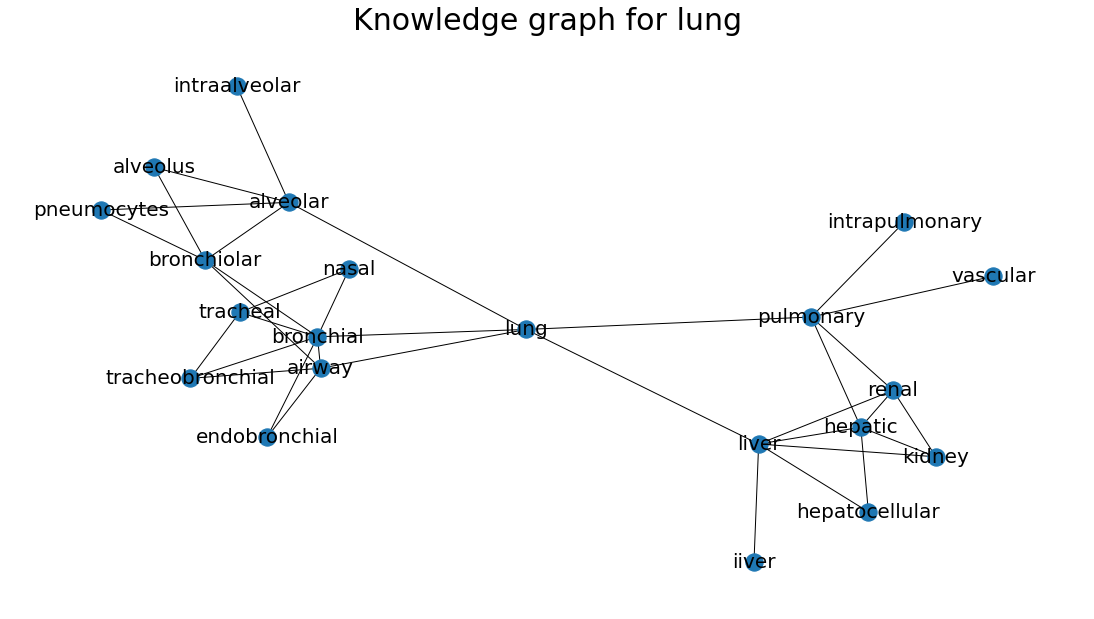

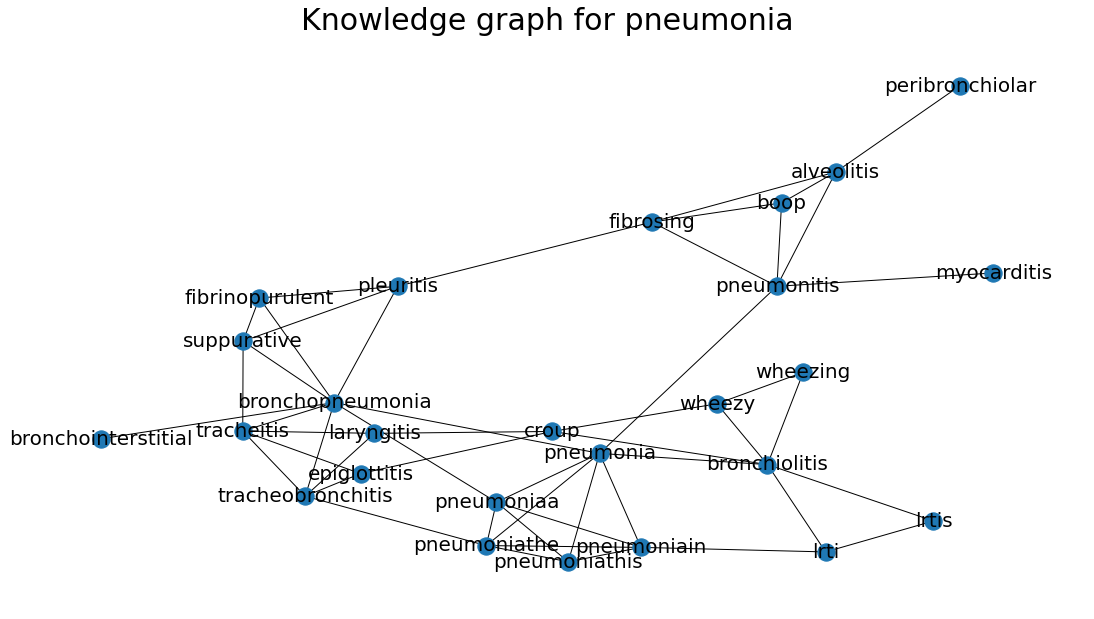

In [ ]:
for i in keywords:
  plt.rcParams['figure.figsize'] = [15,8]
  subgraph = nx.node_connected_component(f,i)
  nx.draw(g.subgraph(subgraph), with_labels=True, font_size = 20)
  plt.title("Knowledge graph for "+i, fontsize = 30)
  plt.show()
  print()
